# Wine Dataset Classification

This project uses the Wine dataset from scikit-learn to practice machine learning classification.
The dataset contains 13 features related to chemical analysis of wines from three different cultivars.
The goal is to classify the type of wine based on its chemical properties.


### Supervised Learning: KNN Classification

### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
#import warning
import warnings
warnings.filterwarnings('ignore')


### Step 2: Load Dataset

#### In this step you can find a dataset from a data website or importing a dataset from some liberary as array or dataFrame(numpy or pandas)

In [2]:
wine=datasets.load_wine()
wine.data
#wine.target
#wine.target_names
#wine.feature_names

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Step 3: Data Cleaning & Preprocessing

In [6]:
df=pd.DataFrame( wine.data ,columns=wine.feature_names )
df['target'] =wine.target
df['Class']= df.target.apply(lambda i:wine.target_names[i])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


In [7]:
df.shape


(178, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [9]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
Class                           0
dtype: int64

In [10]:
df.Class.value_counts() 
#we knowed oir data are impalance

Class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

### Step 4: Exploratory Data Analysis (EDA) 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


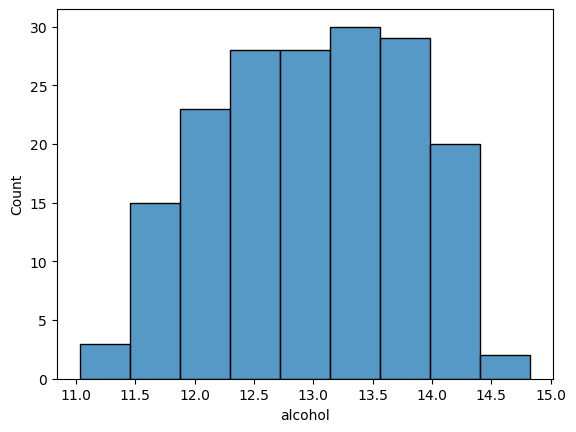

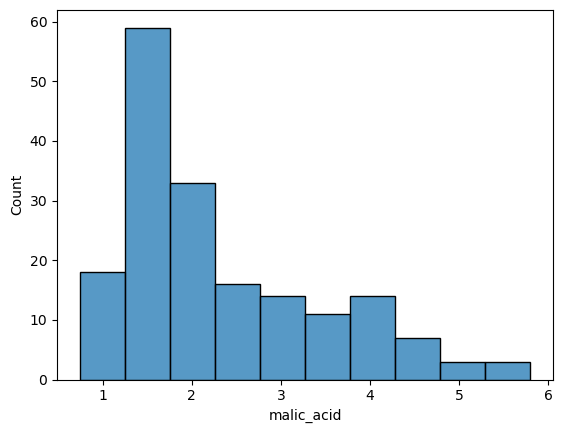

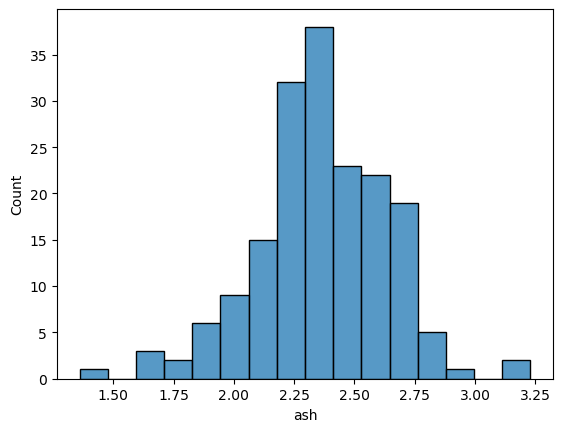

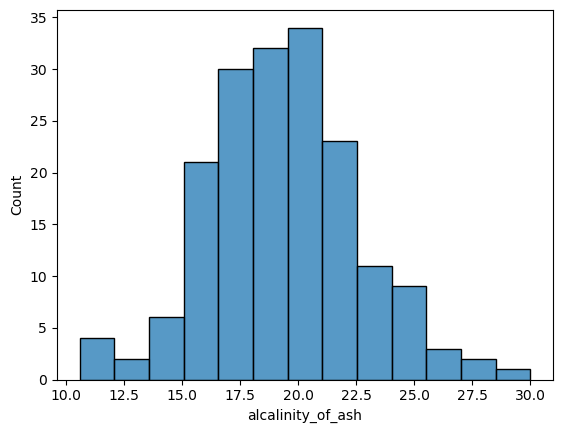

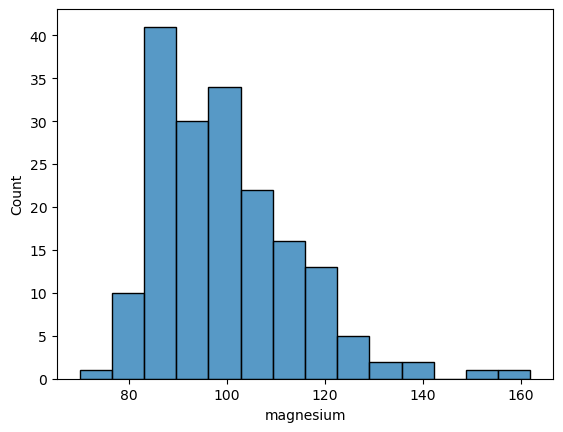

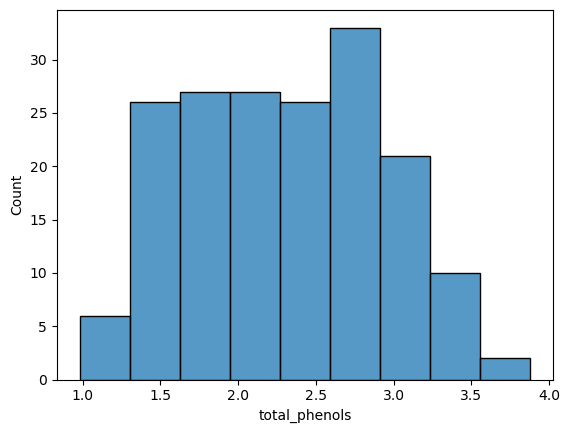

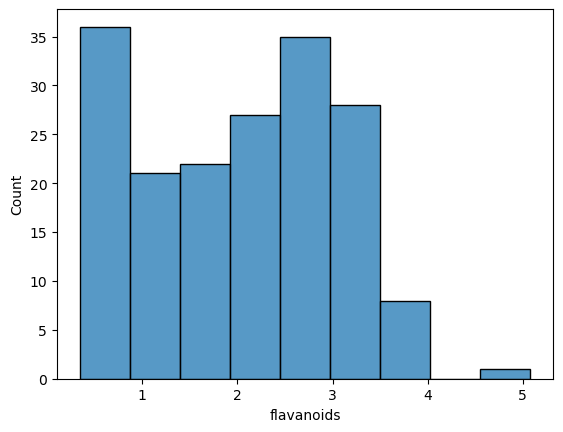

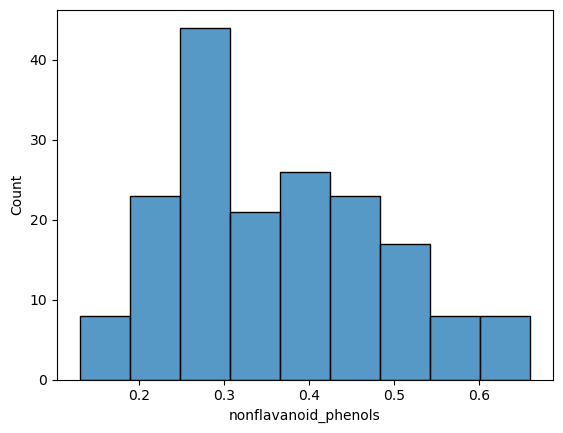

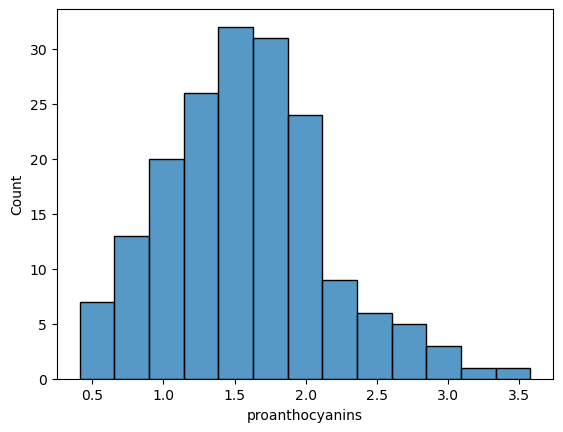

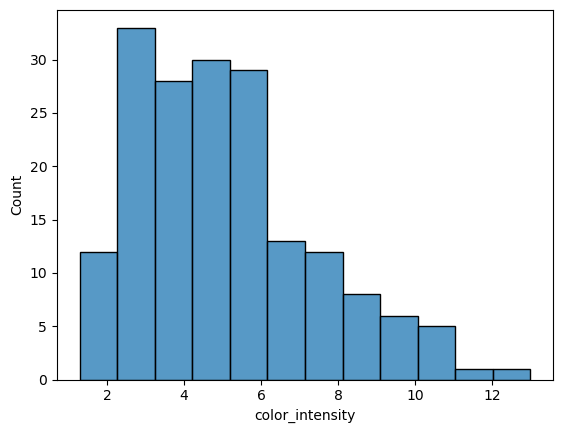

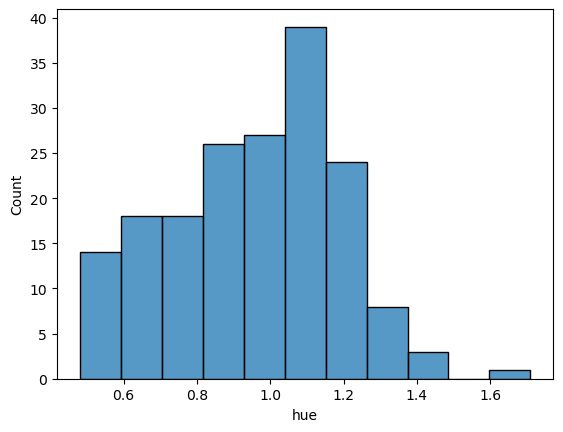

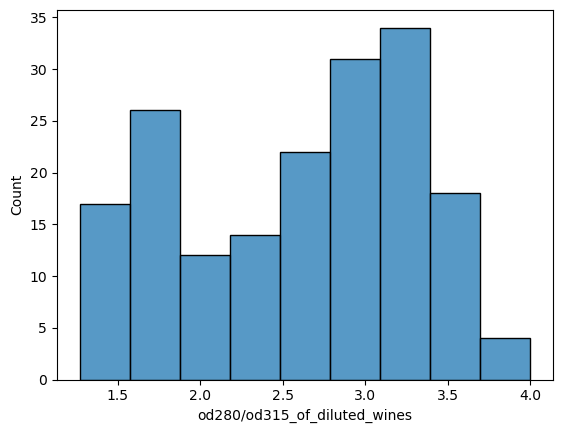

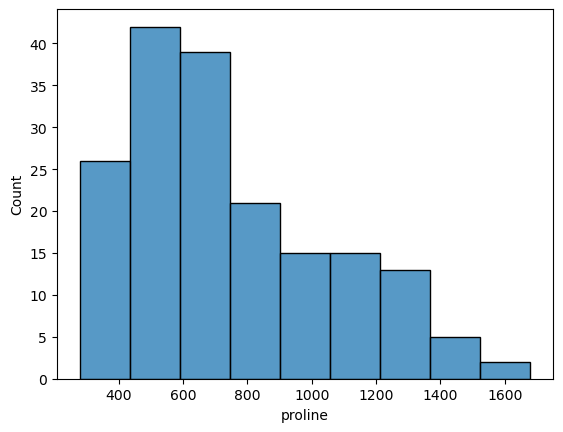

In [21]:
#dfn=df.columns[0:13]
#plt.subplot(6,2,i)
for i in df.columns[0:13] :
    sns.histplot(data=df, x=i)
    plt.show()

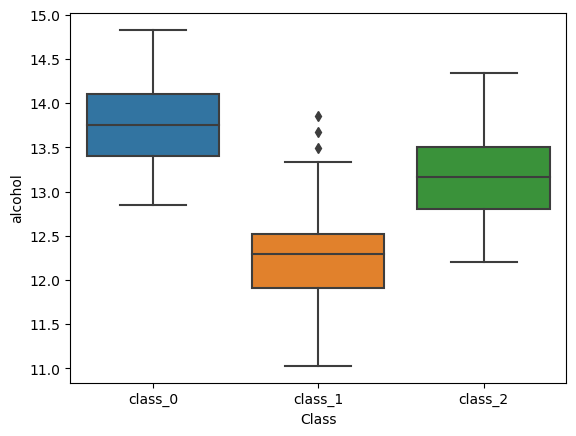

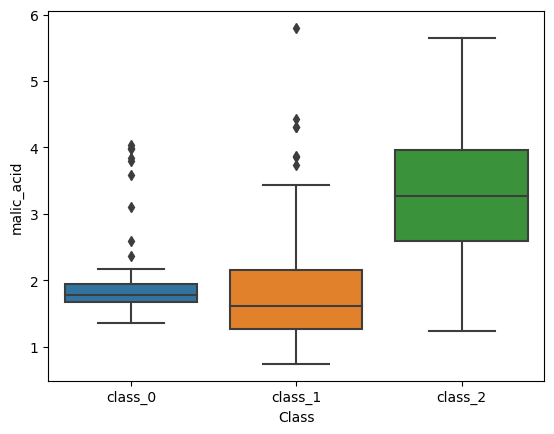

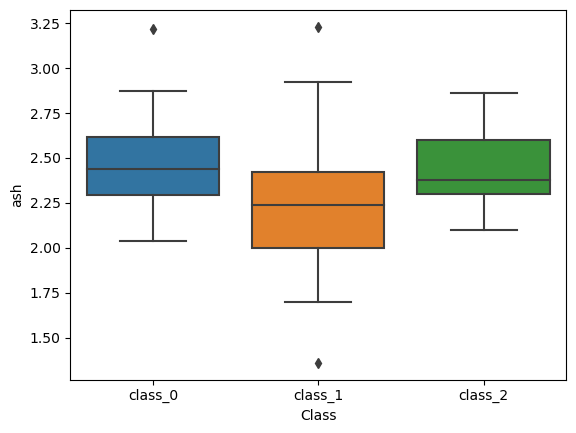

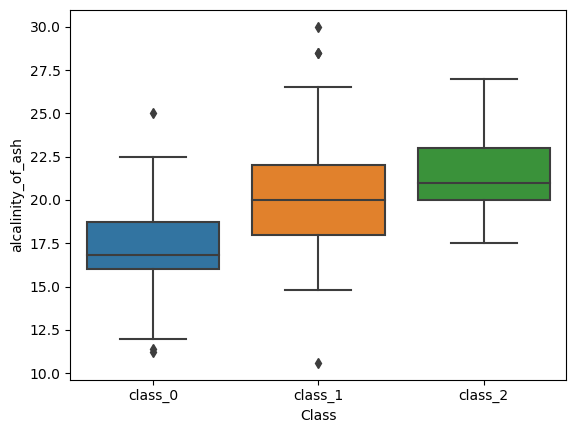

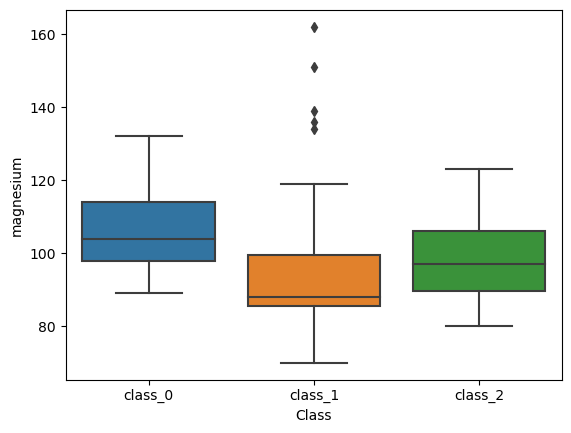

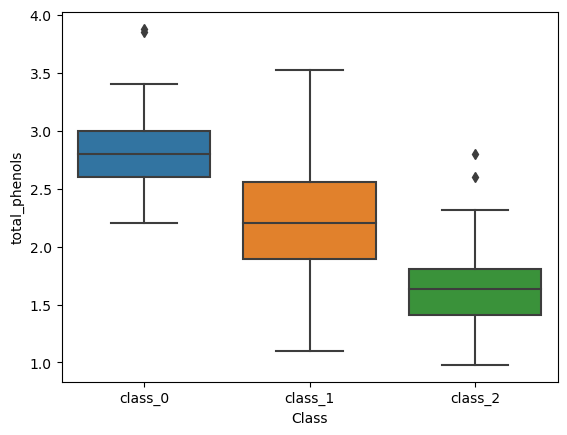

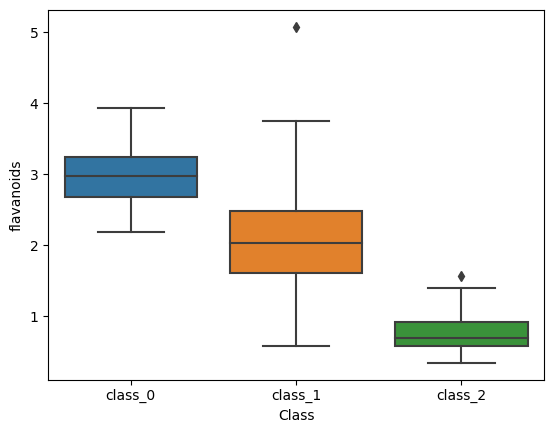

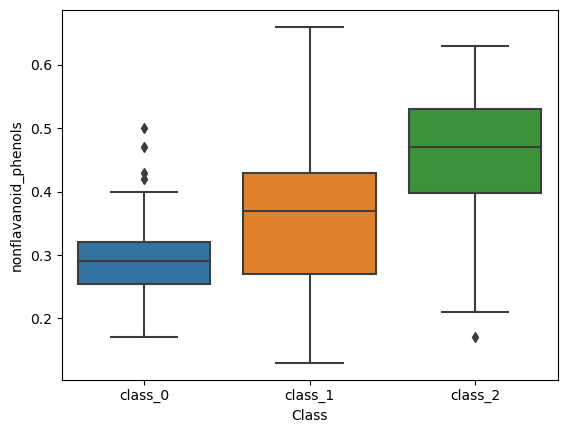

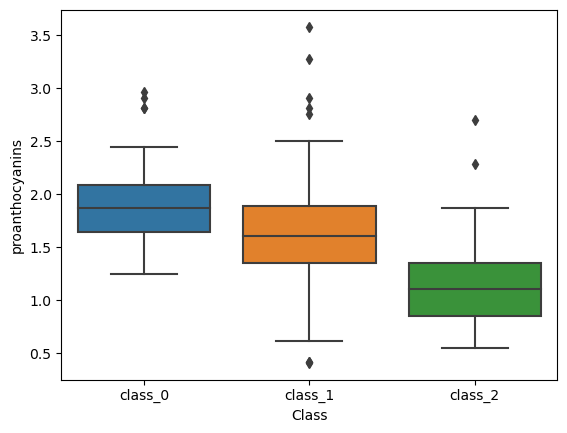

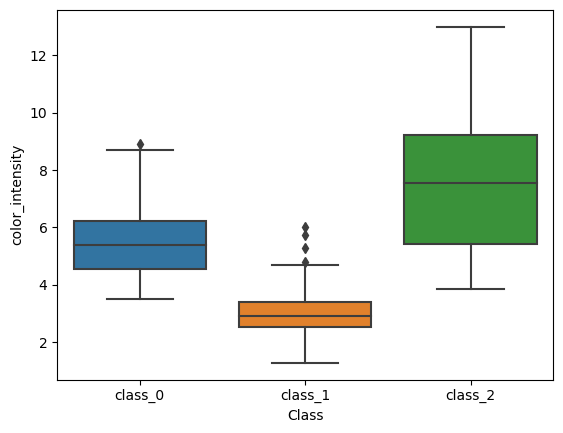

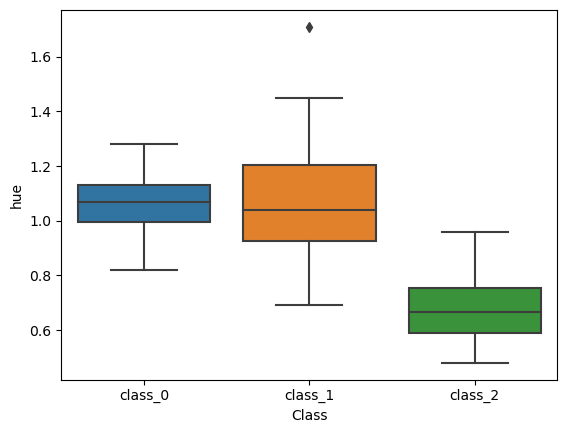

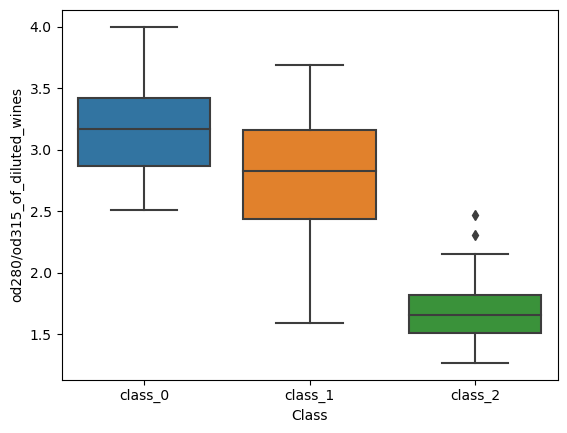

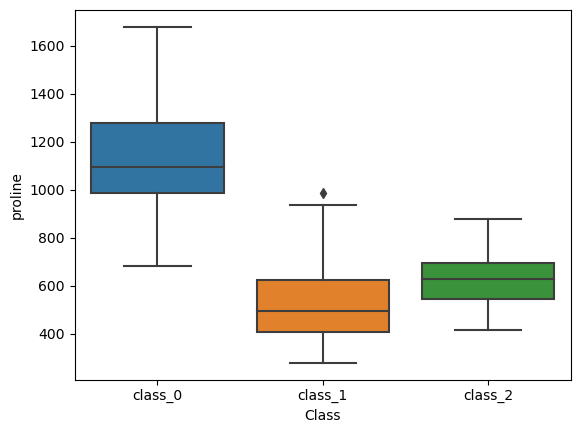

In [20]:
for i in df.columns[0:13]:
    sns.boxplot(x='Class',y=i, data=df)
    plt.show()

In [41]:
dfc=df.iloc[:,:14]
dfc.shape
dfc.corr()
#dfc.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

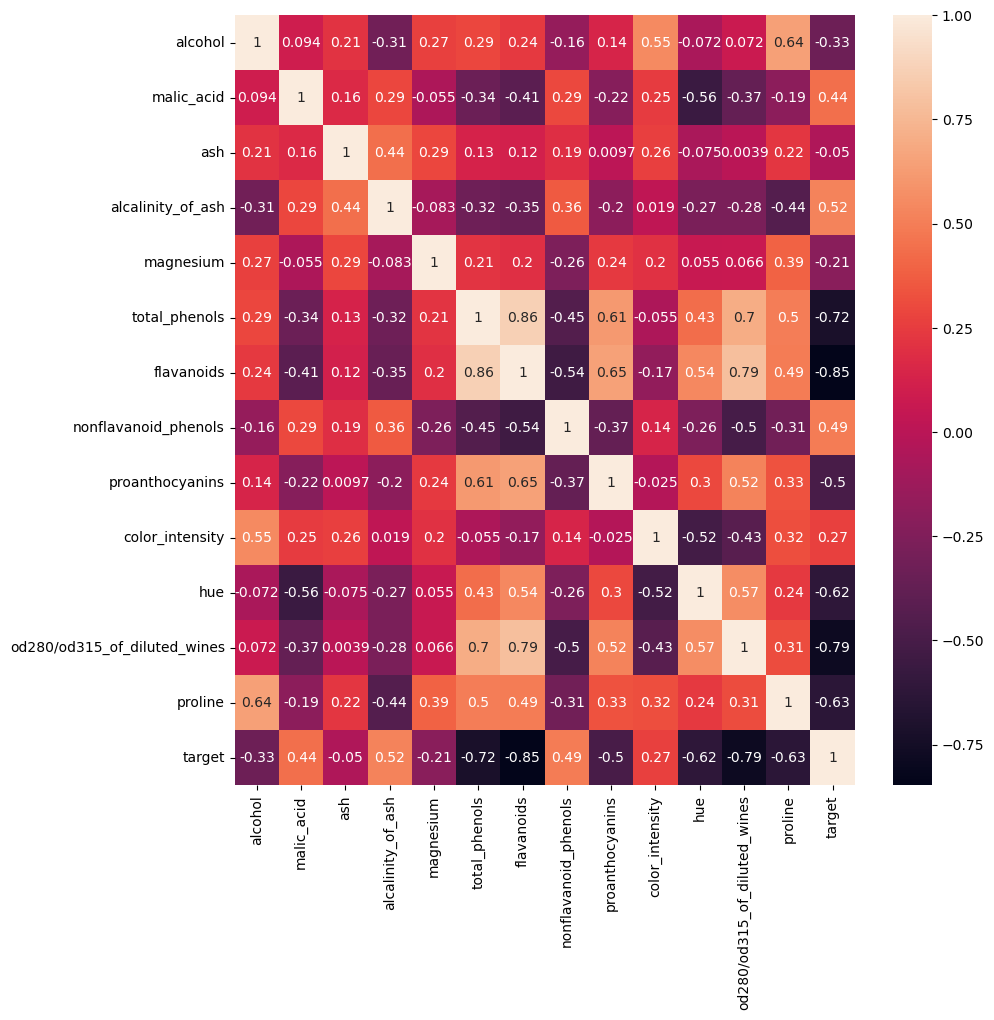

In [47]:
dco=dfc.corr()
plt.figure(figsize=(10,10))
sns.heatmap(dco , annot=True)

### Step 5: Splitting the Data (Train/Test Sets)  & Model Training

In [7]:
X=wine.data
y=wine.target

In [8]:
#cross-validation stratgey
X_train ,X_test, y_train, y_test=train_test_split(X,y , test_size=0.2 , stratify= y) #random_state=1==>Fixing random sample selection for once
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred=knn.predict(X_test)
comp=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
comp
knn.score(X_test,y_test)
#pred=knn.predict()

0.7222222222222222

### Step 6: Feature scaling (Standardize Feature)

In [45]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, stratify=y)
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [11]:
knn=KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [12]:
y_pred=knn.predict(X_test)
comp=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
comp
knn.score(X_test,y_test)

0.9444444444444444

### Step 7: Model Evaluation 

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

<Axes: >

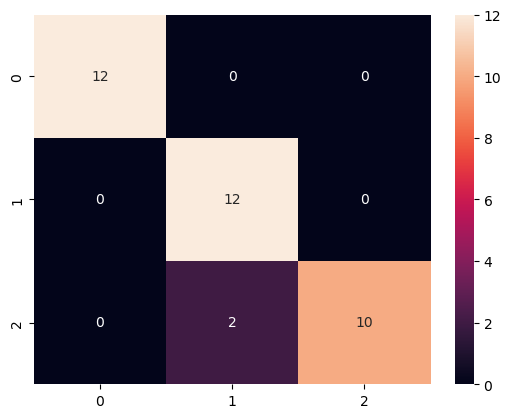

In [14]:
cm=confusion_matrix(y_pred ,y_test)
pd.DataFrame(cm)
sns.heatmap(cm, annot= True)

In [19]:
accuracy_score(y_pred, y_test)

0.9444444444444444

In [15]:
classification_report( y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       1.00      0.86      0.92        14\n           2       0.83      1.00      0.91        10\n\n    accuracy                           0.94        36\n   macro avg       0.94      0.95      0.94        36\nweighted avg       0.95      0.94      0.94        36\n'

### Step 8: Hyperparameter Tuning (Finding the Best K Value)

In [25]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
knn.score(X_test, y_test)

0.9444444444444444

In [46]:
kaac_Xtrain=[]
for i in range(1,len(X_train)):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    kaac_Xtrain.append(knn.score(X_test, y_test))
    
ok=kaac_Xtrain.index(max(kaac_Xtrain))+1
ok  

3

In [49]:
kaac_Xtrain=[]
kaac_Xtest=[]
for i in range(1,len(X_train)):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    kaac_Xtrain.append(knn.score(X_train, y_train))
    kaac_Xtest.append(knn.score(X_test, y_test))
ok_train=kaac_Xtrain.index(max(kaac_Xtrain))+1
ok_test=kaac_Xtest.index(max(kaac_Xtest))+1

In [50]:
ok_train , ok_test

(1, 3)

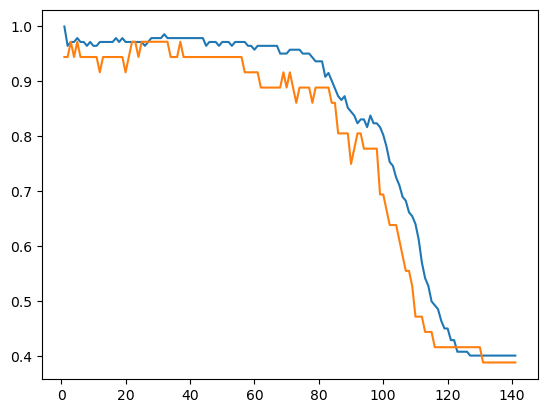

In [55]:
plt.plot(range(1,len(X_train)), kaac_Xtrain ) #,plt.plot(range(1,len(X_train)), kaac_Xtest )
plt.plot(range(1,len(X_train)), kaac_Xtest )

In [34]:
knn=KNeighborsClassifier(n_neighbors=ok)

### Step 9: Trying Different Distance Metrics (Minkowski)

In [57]:
knn = KNeighborsClassifier(metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn.score(X_test , y_test)

0.9722222222222222

### Step 9: Trying Different Distance Metrics (Minkowski, Euclidean, etc.)

In [56]:
knn = KNeighborsClassifier(n_neighbors=ok, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn.score(X_test , y_test)

0.9722222222222222